In [1]:
import numpy as np

result_ori = -(10/16 * np.log2(10/16)) - (6/16 * np.log2(6/16))
print(result_ori)

0.954434002924965


In [2]:
# R1 영역
result1 = (8/16) * -((7/8) * np.log2(7/8) + (1/8) * np.log2(1/8))

# R2 영역
result2 = (8/16) * -((5/8) * np.log2(5/8) + (3/8) * np.log2(3/8))

result_split = result1 + result2
print(result_split)

0.7489992230622807


In [3]:
# 따라서 정보획등량은
print(result_ori - result_split)

0.20543477986268432


In [4]:
# 전체 데이터에 대한 Entropy
result = -((9/14) * np.log2(9/14) + (5/14) * np.log2(5/14))
print(result)

0.9402859586706311


In [5]:
# Wind 영역
result_wind_weak = 8/14 * (-6/8 * np.log2(6/8) - 2/8 * np.log2(2/8))
result_wind_strong = 6/14 * (-3/6 * np.log2(3/6) - 3/6 * np.log2(3/6))

result_wind = result_wind_weak + result_wind_strong
print(result_wind)

0.8921589282623617


In [6]:
# Outlook 영역
result_outlook_sunny = 5/14 * (-2/5 * np.log2(2/5) - 3/5 * np.log2(3/5))
result_outlook_overcast = 4/14 * (-4/4 * np.log2(4/4) )
result_outlook_rain = 5/14 * (-3/5 * np.log2(3/5) - 2/5 * np.log2(2/5))

result_outlook = result_outlook_sunny + result_outlook_overcast + result_outlook_rain
print(result_outlook)

0.6935361388961918


In [7]:
# Humidity 영역
result_humidity_high = 7/14 * (-3/7 * np.log2(3/7) - 4/7 * np.log2(4/7))
result_humidity_normal = 7/14 * (-6/7 * np.log2(6/7) - 1/7 * np.log2(1/7))

result_humidity = result_humidity_high + result_humidity_normal
print(result_humidity)

0.7884504573082896


In [8]:
# 전체 데이터를 Wind로 분류했을때 우리가 얻을 수 있는 정보량은
print(f'Wind 정보량은 : {result - result_wind}')

# 전체 데이터를 outlook으로 분류했을때 우리가 얻을 수 있는 정보량은
print(f'Outlook 정보량은 : {result - result_outlook}')

# 전체 데이터를 습도(himidity)로 분류 했을때 우리가 얻을 수 있는 정보량은
print(f'Himidity 정보량은 : {result - result_humidity}')

# 따라서 정보획등량은 가장 많은 outlook으로 분류하는게 좋아요!

Wind 정보량은 : 0.04812703040826949
Outlook 정보량은 : 0.24674981977443933
Himidity 정보량은 : 0.15183550136234159


In [9]:
# 이런 Decision Tree를 사용하려면 어떻게 해야 하나요?
# sklearn을 이용해서 사용하면 되요!

# iris 예제를 이용해서 Decision Tree를 구현해 보아요!
# column을 2개만 사용할꺼예요. 꽃받침의 길이와 꽃잎의 길이만 사용할꺼예요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

Matplotlib created a temporary config/cache directory at C:\Users\lee_0\AppData\Local\Temp\matplotlib-s69hzaet because the default path (C:\Users\lee_0\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [10]:
# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target', 'sepal_width', 'petal_width'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=2)

0.9777777777777777


<AxesSubplot:>

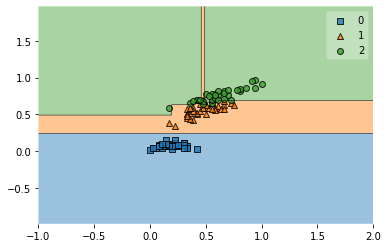

In [11]:
# 모델 생성
model = DecisionTreeClassifier()

model.fit(x_data_train_norm,
          t_data_train)

# Evaluation
print(accuracy_score(t_data_test, model.predict(x_data_test_norm)))

# 시각화
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)

In [12]:
# 우리가 했던 데이터중에 MNIST Data가 있어요!
# 이 데이터셋을 이용해서 다중분류작업을 수행해 볼꺼예요!
# 3가지로 구현해 볼꺼예요!

# 1. Regression을 이용해서 구현(Tensorflow로 구현, sklearn 구현)
# 2. SVM을 이용해서 구현(sklearn으로 구현) - GridSearchCV 활용
# 3. DecisionTreee를 이용해서 구현!

# 각 모델의 정확도는 어떻게 된느지 비교해 보아요!

In [13]:
# 필요한 module import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [15]:
# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\12.07\train.csv")
# display(df)  # 42000 rows × 785 columns

x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

# MinMaNormalization
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# Data Split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

In [16]:
# Logistic Regression Model(sklearn)
logistic_model = LogisticRegression(solver='saga')
logistic_model.fit(x_data_train_norm,
                   t_data_train)
logistic_result = accuracy_score(t_data_test,
                                 logistic_model.predict(x_data_test_norm))

print(logistic_result)

0.917063492063492


c:\Users\lee_0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [17]:
# SVM Model(sklearn)
svm_model = SVC()
svm_model.fit(x_data_train_norm,
              t_data_train)
svm_model_result = accuracy_score(t_data_test,
                                  svm_model.predict(x_data_test_norm))

print(svm_model_result)

0.9737301587301588


In [18]:
# DecisionTree Model(sklearn)
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_data_train_norm,
                        t_data_train)
decision_tree_model_result = accuracy_score(t_data_test,
                                            decision_tree_model.predict(x_data_test_norm))

print(decision_tree_model_result)

0.8523809523809524


In [19]:
# Logistic Regression (Tensorflow Keras)

keras_model = Sequential()
keras_model.add(Flatten(input_shape=(784,)))
keras_model.add(Dense(units=10,
                      activation='softmax'))
keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])
keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=100,
                batch_size=100,
                validation_split=0.3,
                verbose=1)

keras_model.evaluate(x_data_test_norm,
                     t_data_test)

Epoch 1/100
206/206 [==============================] - 1s 2ms/step - loss: 0.4321 - acc: 0.8735 - val_loss: 0.3085 - val_acc: 0.9107
Epoch 2/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2918 - acc: 0.9152 - val_loss: 0.3004 - val_acc: 0.9159
Epoch 3/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2773 - acc: 0.9201 - val_loss: 0.2939 - val_acc: 0.9159
Epoch 4/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2589 - acc: 0.9251 - val_loss: 0.2923 - val_acc: 0.9192
Epoch 5/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2512 - acc: 0.9278 - val_loss: 0.3001 - val_acc: 0.9170
Epoch 6/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2424 - acc: 0.9289 - val_loss: 0.2975 - val_acc: 0.9209
Epoch 7/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2413 - acc: 0.9280 - val_loss: 0.2989 - val_acc: 0.9170
Epoch 8/100
206/206 [==============================] - 0s 2ms/step - 

[0.5473120808601379, 0.8961111307144165]

In [20]:
# KNN을 이용해서 모델구현하고 정확도를 측정해 보아요!
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_data_train_norm,
                        t_data_train)
knn_model_result = accuracy_score(t_data_test,
                                            knn_model.predict(x_data_test_norm))

print(knn_model_result)

0.9644444444444444
